<a href="https://colab.research.google.com/github/MaJu502/proyectoDL/blob/main/proyectoDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto Deep Learning
- Diego Cordova 20212
- Marco Jurado 20308
- Cristian Aguirre 20231
- Paola Contreras 20213
- Paola de Leon 20361

In [1]:
!gdown 1BoNWFSXxtN74PgLcBxfGWyeKUOfevQEP

Downloading...
From: https://drive.google.com/uc?id=1BoNWFSXxtN74PgLcBxfGWyeKUOfevQEP
To: /content/kaggle.json
100% 64.0/64.0 [00:00<00:00, 345kB/s]


In [2]:
! pip install kaggle

In [3]:
!ls -a /root/

.   .bashrc  .config   .jupyter  .launchpadlib	.npm	  .tmux.conf
..  .cache   .ipython  .keras	 .local		.profile  .wget-hsts


In [4]:
!mkdir /root/.kaggle/

In [5]:
!mv /content/kaggle.json /root/.kaggle/


In [6]:
ls /root/.kaggle/


kaggle.json


In [7]:
!chmod 600 /root/.kaggle/kaggle.json

In [8]:
!kaggle datasets download -d jonathanoheix/face-expression-recognition-dataset

 98% 118M/121M [00:03<00:00, 36.2MB/s]
100% 121M/121M [00:03<00:00, 34.6MB/s]


In [9]:
%cd /content
!unzip face-expression-recognition-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/validation/fear/8797.jpg  
  inflating: images/validation/fear/8818.jpg  
  inflating: images/validation/fear/886.jpg  
  inflating: images/validation/fear/9037.jpg  
  inflating: images/validation/fear/9040.jpg  
  inflating: images/validation/fear/9101.jpg  
  inflating: images/validation/fear/911.jpg  
  inflating: images/validation/fear/9179.jpg  
  inflating: images/validation/fear/9205.jpg  
  inflating: images/validation/fear/9232.jpg  
  inflating: images/validation/fear/9251.jpg  
  inflating: images/validation/fear/9261.jpg  
  inflating: images/validation/fear/9281.jpg  
  inflating: images/validation/fear/9302.jpg  
  inflating: images/validation/fear/9333.jpg  
  inflating: images/validation/fear/9369.jpg  
  inflating: images/validation/fear/9370.jpg  
  inflating: images/validation/fear/9474.jpg  
  inflating: images/validation/fear/949.jpg  
  inflating: images/validation/fear/9602.jpg  
  inflating:

## Dividir los videos en frames

In [10]:
pip install opencv-python

Podemos evaluar muchos videos al mismo tiempo y en este proceso volver a frames la cantidad de videos que sea necesaria.

In [11]:
# import cv2
# import os

# # Carpeta que contiene los videos
# video_folder = 'videos/'

# # Carpeta de salida para guardar los frames
# output_folder = 'frames/'

# # Crea la carpeta de salida si no existe
# if not os.path.exists(output_folder):
#     os.makedirs(output_folder)

# # Lista de archivos en la carpeta de videos
# video_files = os.listdir(video_folder)

# for video_file in video_files:
#     if video_file.endswith('.mp4') or video_file.endswith('.avi'):
#         video_path = os.path.join(video_folder, video_file)

#         # Abre el video
#         cap = cv2.VideoCapture(video_path)

#         # Verifica si el video se abrió correctamente
#         if not cap.isOpened():
#             print(f"No se pudo abrir el video: {video_path}")
#             continue

#         frame_count = 0

#         # Lee y guarda los frames como imágenes
#         while True:
#             ret, frame = cap.read()

#             if not ret:
#                 break

#             # Guarda el frame como una imagen
#             frame_filename = os.path.join(output_folder, f'{os.path.splitext(video_file)[0]}_frame_{frame_count:04d}.png')
#             cv2.imwrite(frame_filename, frame)

#             frame_count += 1

#         # Cierra el video
#         cap.release()

#         print(f'Se han guardado {frame_count} frames del video {video_file} como imágenes.')

# print('Proceso completo.')

# Modelo

In [12]:
import cv2
import os
import numpy as np

# Directorio raíz que contiene subdirectorios para cada emoción
root_dir = './images/train/'

# Lista de emociones
emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# Inicializa un diccionario para almacenar shapes únicos por emoción
unique_shapes_by_emotion = {emotion: [] for emotion in emotions}

# Itera a través de las carpetas de emociones
for emotion in emotions:
    emotion_dir = os.path.join(root_dir, emotion)
    image_files = os.listdir(emotion_dir)

    # Itera a través de los archivos de imágenes en cada carpeta de emoción
    for image_file in image_files:
        image_path = os.path.join(emotion_dir, image_file)
        image = cv2.imread(image_path)
        shape = image.shape
        if shape not in unique_shapes_by_emotion[emotion]:
            unique_shapes_by_emotion[emotion].append(shape)

# Imprime los shapes únicos por emoción
for emotion, shapes in unique_shapes_by_emotion.items():
    print(f"Shapes únicos para la emoción '{emotion}':")
    for shape in shapes:
        print(shape)


Shapes únicos para la emoción 'angry':
(48, 48, 3)
Shapes únicos para la emoción 'disgust':
(48, 48, 3)
Shapes únicos para la emoción 'fear':
(48, 48, 3)
Shapes únicos para la emoción 'happy':
(48, 48, 3)
Shapes únicos para la emoción 'neutral':
(48, 48, 3)
Shapes únicos para la emoción 'sad':
(48, 48, 3)
Shapes únicos para la emoción 'surprise':
(48, 48, 3)


In [13]:
# building data generator

from keras.preprocessing.image import ImageDataGenerator

batch_size = 128
base_path = "./images/"


train_datagen = ImageDataGenerator(rescale = 1.0/255.0,
                                  width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   rotation_range = 20,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale= 1.0/255)

train_generator = train_datagen.flow_from_directory(base_path + "train",
                                                    target_size=(56,56),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

validation_generator = validation_datagen.flow_from_directory(base_path + "validation",
                                                    target_size=(56,56),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [14]:
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam

nb_classes = 7

# CNN
model = Sequential()

# Primera capa convolucional
model.add(Conv2D(64,(3,3), padding='same', input_shape=(56, 56,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Segunda capa convolucional
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Tercera capa convolucional
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Cuarta capa convolucional
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Primera Fully connected
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Segunda Fully connected
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(nb_classes, activation='softmax'))

print(model.summary())

opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 56, 56, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 56, 56, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 56, 56, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 28, 28, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 28, 28, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 128)       2

None


In [17]:
%%time
epochs = 30

from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit_generator(generator=train_generator,
                                steps_per_epoch=train_generator.n//train_generator.batch_size,
                                epochs=epochs,
                                validation_data = validation_generator,
                                validation_steps = validation_generator.n//validation_generator.batch_size,
                                callbacks=callbacks_list
                                )

Epoch 1/30


<timed exec>:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


225/225 [==============================] - ETA: 0s - loss: 1.0818 - accuracy: 0.5925
Epoch 1: val_accuracy improved from -inf to 0.49872, saving model to model_weights.h5
225/225 [==============================] - 35s 155ms/step - loss: 1.0818 - accuracy: 0.5925 - val_loss: 1.2981 - val_accuracy: 0.4987
Epoch 2/30
225/225 [==============================] - ETA: 0s - loss: 1.0741 - accuracy: 0.5909
Epoch 2: val_accuracy improved from 0.49872 to 0.54787, saving model to model_weights.h5
225/225 [==============================] - 35s 155ms/step - loss: 1.0741 - accuracy: 0.5909 - val_loss: 1.2649 - val_accuracy: 0.5479
Epoch 3/30
225/225 [==============================] - ETA: 0s - loss: 1.0614 - accuracy: 0.5951
Epoch 3: val_accuracy did not improve from 0.54787
225/225 [==============================] - 34s 152ms/step - loss: 1.0614 - accuracy: 0.5951 - val_loss: 1.4580 - val_accuracy: 0.4503
Epoch 4/30
225/225 [==============================] - ETA: 0s - loss: 1.0541 - accuracy: 0.6019

In [18]:
import pickle

model_filename = "model.pkl"

with open(model_filename, 'wb') as model_file:
    pickle.dump(model, model_file)


In [22]:
import matplotlib.pyplot as plt

def plot_results(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize = (24, 6))
    plt.subplot(1,2,1)
    plt.plot(epochs, acc, 'b', label = 'Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
    plt.grid(True)
    plt.legend()
    plt.xlabel('Epoch')



    plt.subplot(1,2,2)
    plt.plot(epochs, loss, 'b', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
    plt.grid(True)
    plt.legend()
    plt.xlabel('Epoch')
    plt.show()

def get_best_epcoh(history):
    valid_acc = history.history['val_accuracy']
    best_epoch = valid_acc.index(max(valid_acc)) + 1
    best_acc =  max(valid_acc)
    print('Best Validation Accuracy Score {:0.5f}, is for epoch {}'.format( best_acc, best_epoch))
    return best_epoch

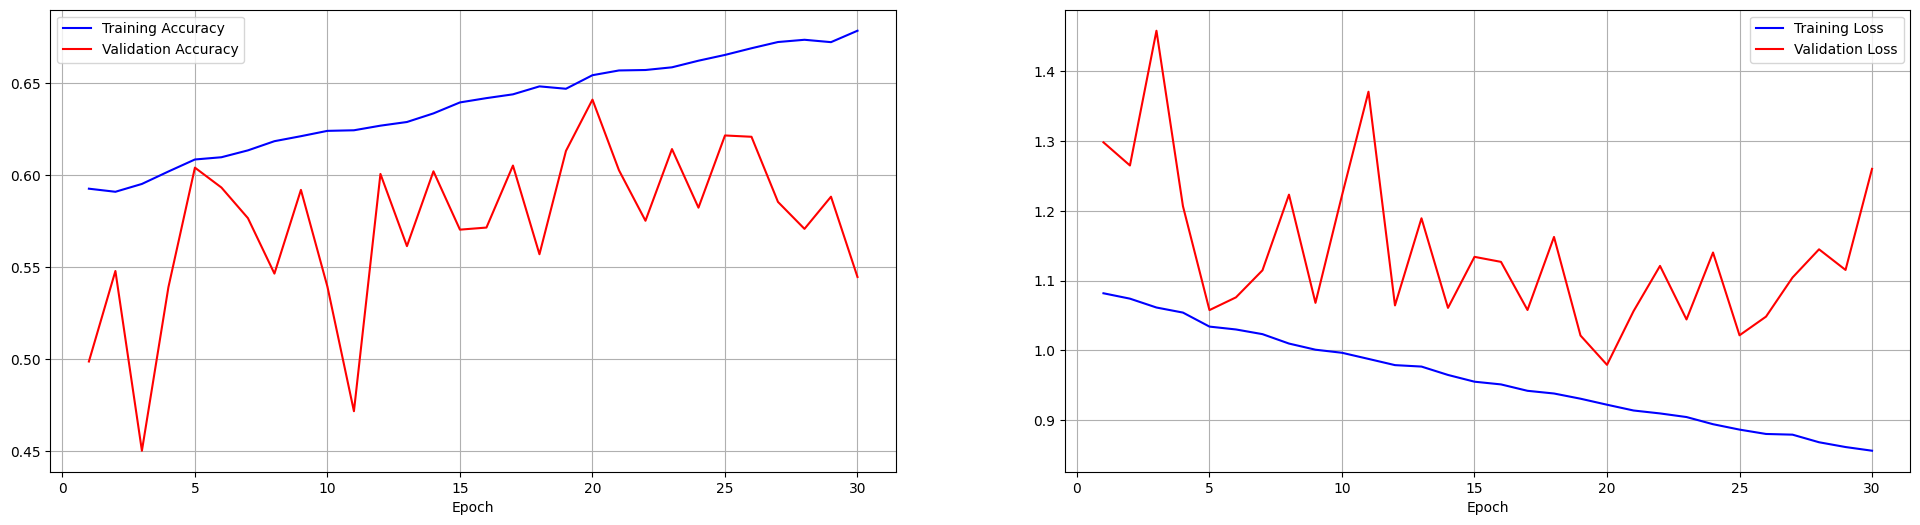

Best Validation Accuracy Score 0.64091, is for epoch 20


In [23]:
plot_results(history)
best_epoch =get_best_epcoh(history)